In [4]:
# import kagglehub
# import os
# import shutil

# # Define the path where you want to download the dataset
desired_path = "C:/repos/ECDS-NeuralNets/Day 1/Dataset"

# # Download laval version
# default_path = kagglehub.dataset_download("uciml/iris")

# # Move the downloaded files to your desired directory
# shutil.move(default_path, desired_path)

# print("Path to dataset files:", desired_path)

In [5]:
import pandas as pd
iris_data = pd.read_csv(f'{desired_path}/2/Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris_data.drop('Id', axis=1, inplace=True)

In [10]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

![Alt text](https://miro.medium.com/v2/format:webp/1*pO5X2c28F1ysJhwnmPsy3Q.gif)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define the Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        # Input layer (4 features) -> Hidden layer (36 neurons)
        self.fc1 = nn.Linear(input_size, 36)
        # Hidden layer (36 neurons) -> Hidden layer (24 neurons)
        self.fc2 = nn.Linear(36, 24)
        # Hidden layer (24 neurons) -> Output layer (3 classes)
        self.fc3 = nn.Linear(24, 3)
        # ReLU activation function
        self.relu = nn.ReLU()
        # Softmax activation for multi-class classification
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass input through the network
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)


### ReLU Activation Function

The **Rectified Linear Unit (ReLU)** is one of the most commonly used activation functions in deep learning/neural networks. particularly for hidden layers in neural networks.

#### Formula:

$$
f(x) = \max(0, x)
$$

Where:
- $x$ is the input to the neuron.
- The output is $x$ if $x \geq 0$, otherwise it is `0`.

In piecewise form:

$$
f(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\
x & \text{if } x \geq 0
\end{cases}
$$

#### What is ReLU?
ReLU is a simple, piecewise linear function that outputs:
- **0** when the input is negative.
- The **input itself** when the input is positive.

#### Why is ReLU Important in Hidden Layers?

1. **Simplicity and Efficiency**:
   - ReLU is computationally efficient because it involves simple operations like comparison and maximum, making it faster to compute than other activation functions like sigmoid or tanh.

2. **Avoids Vanishing Gradient Problem**:
   - Unlike sigmoid or tanh, ReLU does not saturate in the positive region, which helps mitigate the **vanishing gradient problem**. This allows gradients to propagate more effectively during backpropagation.

3. **Sparsity**:
   - ReLU introduces sparsity by setting negative values to zero, which means only a subset of neurons are active at any time. This can improve model efficiency and interpretability.

4. **Better Performance**:
   - Empirically, neural networks using ReLU tend to converge faster and often achieve better performance compared to those using sigmoid or tanh.

### Softmax Activation Function

The **Softmax** function is commonly used in the output layer of neural networks for multi-class classification problems.

#### Formula:

For an input vector $\mathbf{z} = [z_1, z_2, \dots, z_n]$, the softmax function is defined as:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

Where:
- $z_i$ is the $i$-th element of the input vector.
- $n$ is the number of classes.
- $e$ is Euler's number (approximately 2.718).

#### What is Softmax?

The **Softmax** function converts the raw output (logits) of a neural network into a probability distribution over multiple classes. The output values are in the range [0, 1], and the sum of all the probabilities is equal to 1.

#### Why is Softmax Important in the Output Layer?

1. **Probability Interpretation**:
   - Softmax transforms the output logits into probabilities. Each output can be interpreted as the probability that the input belongs to a specific class, making it suitable for **multi-class classification**.

2. **Ensures Outputs Sum to 1**:
   - Softmax ensures that the sum of all output probabilities is exactly 1, making the outputs a valid probability distribution.

3. **Facilitates Cross-Entropy Loss**:
   - In classification tasks, **cross-entropy loss** is often used as the loss function. Softmax works seamlessly with cross-entropy by providing a differentiable probability output, which makes it easier to optimize the network during backpropagation.

4. **Handles Multi-Class Classification**:
   - Unlike activation functions like sigmoid, which are designed for binary classification, softmax is ideal when there are more than two classes, as it provides a probability distribution across all possible classes.

#### Example:

If a neural network outputs logits `[2.0, 1.0, 0.1]`, the softmax function will transform these into probabilities like `[0.7, 0.2, 0.1]`, indicating the most likely class.

---

### Summary:
- **Softmax** is essential for multi-class classification because it converts raw logits into a probability distribution.
- It provides a clear, interpretable output where each class is assigned a probability.
- Softmax works well with **cross-entropy loss**, making it a standard choice for the output layer in classification models.


In [19]:
# Extract features and labels
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = iris_data.drop('Species', axis=1)  # Features (4 columns)
y = iris_data['Species']  # Original string labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels into numeric labels

# Split the dataset into training and valing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# # Check the shapes of the splits to confirm they match
# print("X_train shape:", X_train.shape)  # Should be (120, 4)
# print("y_train shape:", y_train.shape)  # Should be (120,)
# print("X_val shape:", X_val.shape)    # Should be (30, 4)
# print("y_val shape:", y_val.shape)    # Should be (30,)

# Convert to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_val_tensor = torch.Tensor(X_val)
y_val_tensor = torch.LongTensor(y_val)

# # Verify tensor shapes
# print("X_train_tensor shape:", X_train_tensor.shape)  # Should be (120, 4)
# print("y_train_tensor shape:", y_train_tensor.shape)  # Should be (120,)
# print("X_val_tensor shape:", X_val_tensor.shape)    # Should be (30, 4)
# print("y_val_tensor shape:", y_val_tensor.shape)    # Should be (30,)


### Stochastic Gradient Descent (SGD) Formula:

$$
\theta = \theta - \eta \nabla J(\theta)
$$

where:
- $\theta$: Model parameters (weights).
- $\eta$: Learning rate (step size).
- $\nabla J(\theta)$: Gradient of the loss function $J$ with respect to the parameters $theta$.

### Explanation:
1. **Gradient $\nabla J(\theta)$**: Computes the direction and magnitude to adjust the parameters.
2. **Learning Rate $\eta$**: Controls how much the parameters are updated.
3. **Parameter Update**: $\theta$ is updated in the direction that minimizes the loss.

For SGD, the gradient is computed using a single random sample or a small batch instead of the entire dataset, making it computationally efficient.<br>

![Alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp)
### Cross-Entropy Loss Formula:

$$
\mathcal{L} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$

where:  
- $C$ is the number of classes.  
- $y_i$ is the actual label (1 if class \(i\) is the correct class, 0 otherwise).  
- $\log(\hat{y}_i)$ is the predicted probability for class \(i\).
- This measures the difference between the predicted probabilities (after applying softmax) and the actual class labels. It's used to evaluate how well the predicted probabilities match the true labels.


Epoch [10/100], Loss: 1.0915, Accuracy: 34.17%
Epoch [20/100], Loss: 1.0713, Accuracy: 34.17%
Epoch [30/100], Loss: 1.0460, Accuracy: 76.67%
Epoch [40/100], Loss: 1.0105, Accuracy: 80.83%
Epoch [50/100], Loss: 0.9610, Accuracy: 83.33%
Epoch [60/100], Loss: 0.9091, Accuracy: 83.33%
Epoch [70/100], Loss: 0.8702, Accuracy: 85.00%
Epoch [80/100], Loss: 0.8382, Accuracy: 88.33%
Epoch [90/100], Loss: 0.8094, Accuracy: 86.67%
Epoch [100/100], Loss: 0.7850, Accuracy: 87.50%
Total Losses: 100
Total Accuracies: 100


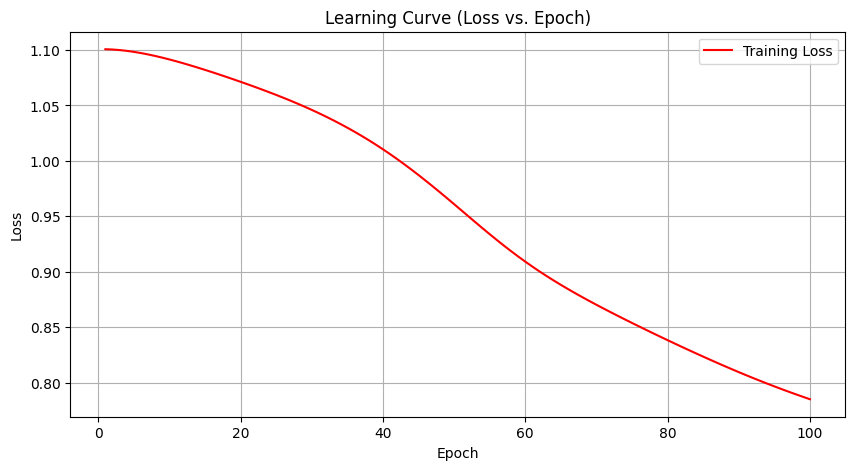

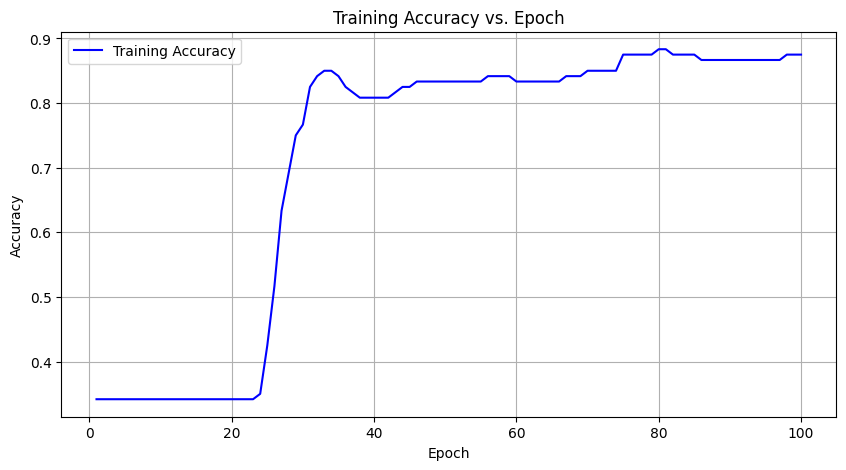

In [33]:
import matplotlib.pyplot as plt

# Initialize model, loss, and optimizer
input_size = X.shape[1]
model = SimpleNN(input_size)
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  

# Lists to store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(100):  # Number of epochs
    model.train()  # Set model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    losses.append(loss.item())  # Store the loss

    # Backward pass
    optimizer.zero_grad()  # Zero out gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights using SGD

    # Calculate accuracy on training data
    with torch.no_grad():
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y_train_tensor.numpy(), predicted.numpy())
        accuracies.append(accuracy)  # Store accuracy

    # Print loss and accuracy every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')

# Check if the lists are populated correctly
print(f"Total Losses: {len(losses)}")
print(f"Total Accuracies: {len(accuracies)}")

# Plot Loss vs. Epochs (Learning Curve)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), losses, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss vs. Epoch)')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), accuracies, label='Training Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



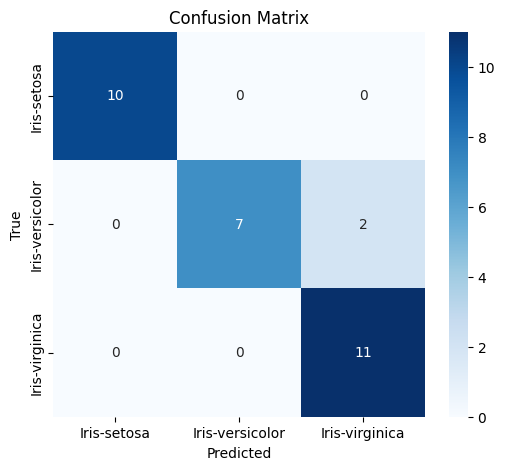

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate the model on the val set
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    y_pred_tensor = model(X_val_tensor)
    _, y_pred = torch.max(y_pred_tensor, 1)  # Get the predicted classes

# Convert predictions and true labels to numpy arrays for scikit-learn functions
y_pred = y_pred.numpy()
y_val = y_val_tensor.numpy()

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_val, y_pred)
print("\nClassification Report:")
print(report)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Model Training Summary

1. **Model is Learning**:
   - Loss starts at **1.0915** and consistently decreases, showing the model is learning.
   - Accuracy starts at **34.17%** and improves significantly, reaching **87.5%** after 100 epochs.

2. **Rapid Improvement in Early Epochs**:
   - The most significant accuracy improvement occurs in the first **40 epochs**, from **34.17%** to **80.83%**.

3. **Saturation of Accuracy**:
   - After **83-88%** accuracy, improvement slows, indicating the model is nearing its performance limit.

4. **Learning Rate Impact**:
   - The model shows steady progress with a **learning rate of 0.01** and **momentum of 0.9**, but further hyperparameter tuning could be beneficial for better performance.

### Conclusion:
- The model is effectively learning, but the accuracy is starting to plateau.
- It might be approaching optimal performance on the training set.
- **Further evaluation on a validation set** could be necessary to check for overfitting and ensure generalization.
